## Data Loading and Initial Exploration:
The code starts by loading crime data from a CSV file, displaying the first few rows to understand the structure of the dataset. This involves columns like 'Month', 'Longitude', 'Latitude', and 'Crime type'.

## Data Cleaning:
The data is filtered to exclude rows with missing location data and then narrowed down to focus on "Violence and sexual offences". This cleaned data is further reduced to keep only relevant columns for analysis: 'Month', 'Longitude', and 'Latitude'.

In [1]:
import pandas as pd
# Load the data
file_path = '/Users/duii/Desktop/crime_prevention_analysis/datasets/UK_Police_Street_Crime_2018-10-01_to_2021_09_31.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
df.head()
# Cleaning the data
# 1. Filter out rows with missing or invalid location data
df_cleaned = df.dropna(subset=['Longitude', 'Latitude'])

df_cleaned = df_cleaned[df_cleaned['Crime type'] == "Violence and sexual offences"]
df_cleaned
# 2. Drop columns that may not be necessary for our geographical and crime type analysis
columns_to_keep = ['Month', 'Longitude', 'Latitude']
df_cleaned = df_cleaned[columns_to_keep]
df_cleaned

,Month,Longitude,Latitude
9,2020-01,-1.882746,53.933807
17,2020-01,-1.819597,53.923411
18,2020-01,-1.819121,53.920696
54,2020-01,-1.822354,53.926776
55,2020-01,-1.820732,53.925147
...,...,...,...
18994548,2018-12,-2.977735,53.090924
18994556,2018-12,-2.967826,53.085234
18994559,2018-12,-2.963595,53.087615
18994560,2018-12,-2.957058,53.093798


In [2]:
# Save the cleaned data to a new CSV file
# save_path = '/Users/neha/DataspellProjects/dissertation_project/with_small_datasets/UK_Police_Street_Crime_2018-10-01_to_2021_09_31.csv'
# df_cleaned.to_csv(save_path, index=False)

## Data Aggregation:
The 'Month' column is converted to a datetime format, and the data is aggregated to count the number of crimes per month. This time series of monthly crime counts forms the basis for subsequent analysis.

In [3]:
data = df_cleaned.copy()
# Convert 'Month' to datetime and set it as index
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Aggregate data to count the number of crimes per month
monthly_crime_count = data.resample('M').size()

# Display the first few rows of the aggregated data
monthly_crime_count.head()


Month
2018-10-31    155135
2018-11-30    147287
2018-12-31    144133
2019-01-31    148395
2019-02-28    140271
Freq: M, dtype: int64

In [4]:
data

,Longitude,Latitude
Month,,
2020-01-01,-1.882746,53.933807
2020-01-01,-1.819597,53.923411
2020-01-01,-1.819121,53.920696
2020-01-01,-1.822354,53.926776
2020-01-01,-1.820732,53.925147
...,...,...
2018-12-01,-2.977735,53.090924
2018-12-01,-2.967826,53.085234
2018-12-01,-2.963595,53.087615


In [5]:
# # Save the cleaned data to a new CSV file
# save_path = '/Users/neha/DataspellProjects/dissertation_project/with_small_datasets/UK_Police_Street_Crime_2018-10-01_to_2021_09_31.csv'
# monthly_crime_counts.to_csv(save_path)

## Time Series Visualization:
A line plot  shows the overall trend in monthly crime counts from January 2019 to September 2021, highlighting any noticeable patterns or outliers in crime occurrence over time.


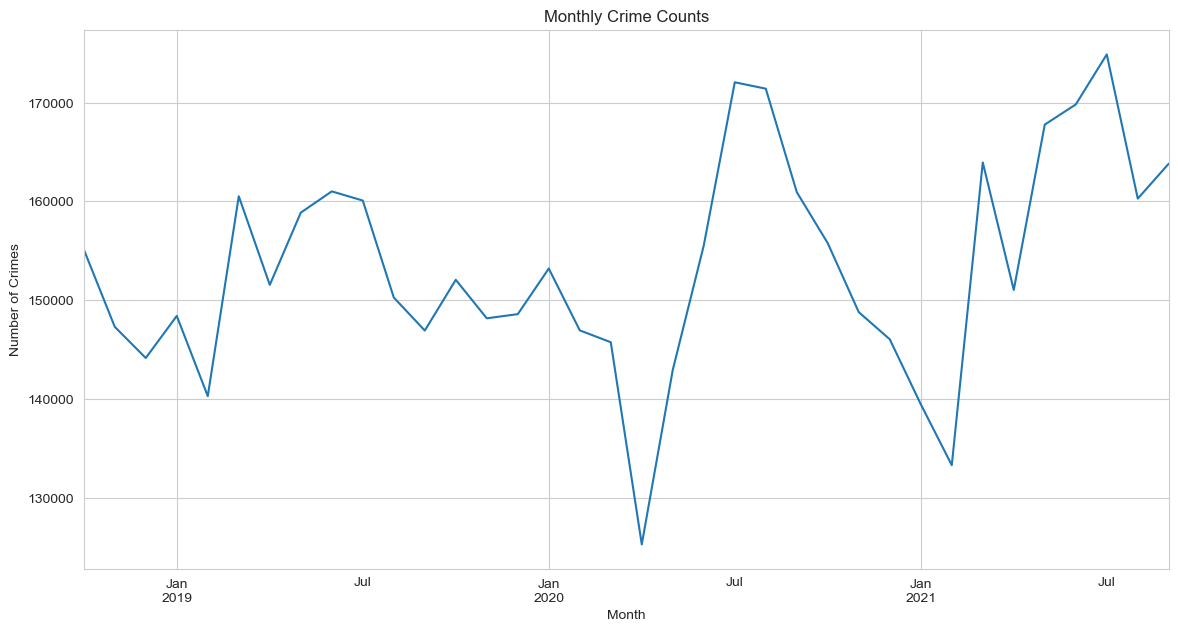

In [6]:
import matplotlib.pyplot as plt

# Plotting the time series of monthly crime counts
plt.figure(figsize=(14, 7))
monthly_crime_count.plot()
plt.title('Monthly Crime Counts')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()


Plot 1: Monthly Crime Counts
This plot displays the number of crimes per month over a period. The visible trend is a fairly cyclical pattern, with noticeable peaks and troughs occurring at regular intervals, indicating possible seasonal variations in crime rates.

Insights:

Seasonal Variability: Crime rates seem to peak during certain months, which could be aligned with specific seasonal factors (like holidays, weather changes, etc.).
Impact of External Events: There's a sharp drop in early 2020, potentially attributable to COVID-19 lockdown measures which would have reduced opportunities for certain types of crimes.

## Time Series Decomposition:
The series is decomposed into trend, seasonal, and residual components using an additive model, allowing visualization of underlying patterns more clearly . This reveals the inherent seasonality and long-term trends in crime data.

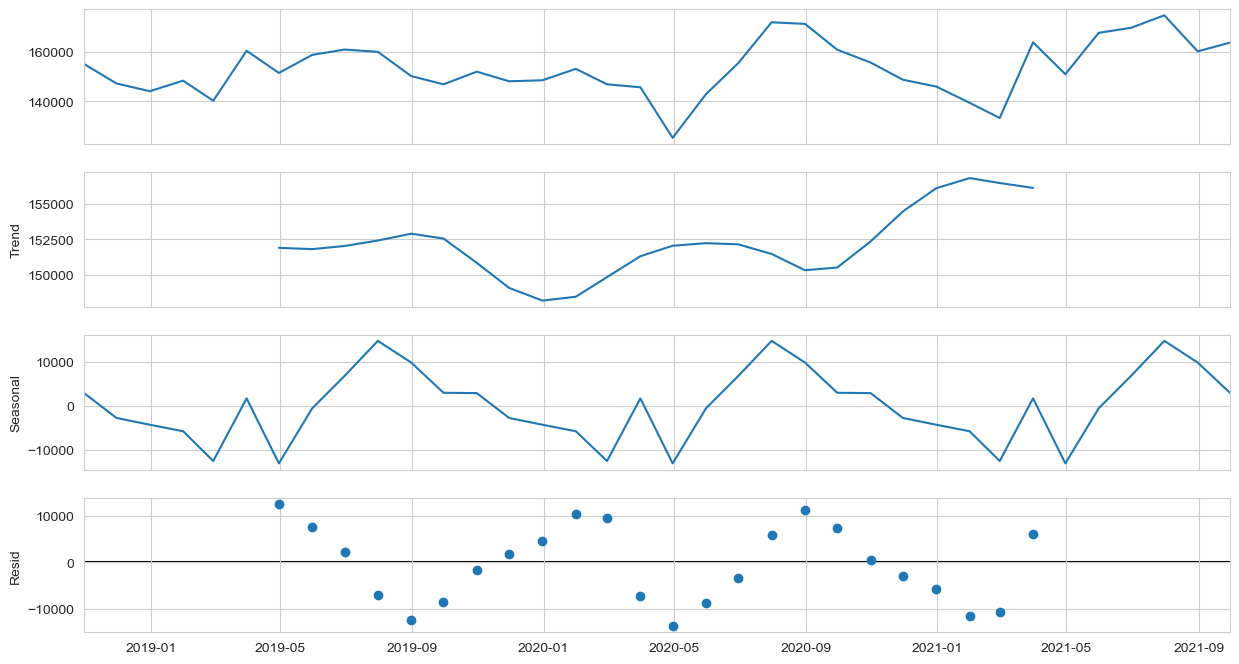

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(monthly_crime_count, model='additive')

# Plotting the decomposed components of the time series
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()


Plot 2: Decomposed Time Series
This shows the original time series decomposed into trend, seasonal, and residual components.

Insights:

Trend Component: There's a slight overall decrease in crime over the observed period until a sharp drop in 2020, followed by a gradual recovery.
Seasonal Component: The seasonality shows a consistent pattern year-over-year, which might be used to anticipate higher crime rates during specific times of the year.
Residual Component: The residuals don’t show any obvious patterns, suggesting that the trend and seasonality have been effectively captured by the model.

# Random forest 

In [8]:
df_cleaned


,Month,Longitude,Latitude
9,2020-01,-1.882746,53.933807
17,2020-01,-1.819597,53.923411
18,2020-01,-1.819121,53.920696
54,2020-01,-1.822354,53.926776
55,2020-01,-1.820732,53.925147
...,...,...,...
18994548,2018-12,-2.977735,53.090924
18994556,2018-12,-2.967826,53.085234
18994559,2018-12,-2.963595,53.087615
18994560,2018-12,-2.957058,53.093798


## Random Forest Modeling:
A different approach using a Random Forest regressor is also implemented. This model uses derived features from the 'Month' column (year and month as numerical features) and predicts future crime rates, which are visualized against the actual data in subsequent images. This model tends to handle nonlinear trends and seasonal effects implicitly through its learning algorithm.


## Data Preparation for Random Forest:
The cleaned dataset is further processed by converting the 'Month' column into a datetime format. The data is then aggregated by month to sum up the total crimes for each period. This results in a time series indexed by month, which is necessary for chronological analysis.


In [9]:
df = df_cleaned.copy()
# Ensure 'Month' is in datetime format
df['Month'] = pd.to_datetime(df['Month'])

# Group by month and count the number of crimes, then reset index
df = df.groupby(df['Month'].dt.to_period('M')).size().reset_index(name='Total Crimes')

# Convert 'Month' back to datetime64[ns] from Period
df['Month'] = df['Month'].dt.to_timestamp()

# Check the resulting DataFrame and data types
print(df)
print(df.dtypes)
df

        Month  Total Crimes
0  2018-10-01        155135
1  2018-11-01        147287
2  2018-12-01        144133
3  2019-01-01        148395
4  2019-02-01        140271
5  2019-03-01        160518
6  2019-04-01        151539
7  2019-05-01        158856
8  2019-06-01        161012
9  2019-07-01        160082
10 2019-08-01        150261
11 2019-09-01        146914
12 2019-10-01        152053
13 2019-11-01        148152
14 2019-12-01        148576
15 2020-01-01        153195
16 2020-02-01        146932
17 2020-03-01        145729
18 2020-04-01        125248
19 2020-05-01        142929
20 2020-06-01        155537
21 2020-07-01        172061
22 2020-08-01        171414
23 2020-09-01        160936
24 2020-10-01        155758
25 2020-11-01        148775
26 2020-12-01        146028
27 2021-01-01        139448
28 2021-02-01        133276
29 2021-03-01        163942
30 2021-04-01        151026
31 2021-05-01        167777
32 2021-06-01        169817
33 2021-07-01        174884
34 2021-08-01       

,Month,Total Crimes
0,2018-10-01,155135
1,2018-11-01,147287
2,2018-12-01,144133
3,2019-01-01,148395
4,2019-02-01,140271
5,2019-03-01,160518
6,2019-04-01,151539
7,2019-05-01,158856
8,2019-06-01,161012
9,2019-07-01,160082


### Data splitting:
The dataset is manually split into training and testing sets, with the last 6 months designated as the test set. This manual split is essential to maintain the time sequence, which can be critical in time series forecasting.

### Feature Engineering:
Since Random Forest cannot utilize date/time data directly, the 'Month' column is transformed into more usable features. Specifically, the year and month are extracted and used as separate numerical features. This transformation allows the Random Forest algorithm to capture any annual trends and monthly seasonal effects.

In [10]:
# Since it's a time series, we'll manually create a train-test split to maintain chronological order
# Let's use the last 6 months as the test set
train_size = len(df) - 6

# Split the dataset
train = df[:train_size]
test = df[train_size:]

# For Random Forest, we need to create features from the 'Month' since it can't directly use dates
# A simple approach could be to use year and month as separate features
train['Year'] = train['Month'].dt.year
train['Month_Num'] = train['Month'].dt.month

test['Year'] = test['Month'].dt.year
test['Month_Num'] = test['Month'].dt.month

# Define the features and target
X_train = train[['Year', 'Month_Num']]
y_train = train['Total Crimes']

X_test = test[['Year', 'Month_Num']]
y_test = test['Total Crimes']

X_train.shape, X_test.shape


/var/folders/cf/4_sxfqsd573_ht7zxl43y6gw0000gn/T/ipykernel_48493/4190697611.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Year'] = train['Month'].dt.year
/var/folders/cf/4_sxfqsd573_ht7zxl43y6gw0000gn/T/ipykernel_48493/4190697611.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Month_Num'] = train['Month'].dt.month
/var/folders/cf/4_sxfqsd573_ht7zxl43y6gw0000gn/T/ipykernel_48493/4190697611.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

((30, 2), (6, 2))

## Model Training:
A Random Forest regressor is initialized and trained on the engineered features. Random Forest is a robust ensemble learning technique that builds multiple decision trees and merges their outputs to improve prediction accuracy and control over-fitting.
The model is trained using historical crime data, allowing it to learn from past patterns and fluctuations in crime rates.

## Prediction and Evaluation:
The trained model is used to predict crime rates for the test set months. This forecast is then compared to the actual observed crimes to evaluate the model’s performance.
Evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) are calculated to quantify the prediction accuracy, providing a measure of the average magnitude of the errors between predicted and actual values.

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

mse, rmse, mae, y_pred


(96644645.23425002,
 9830.800843992824,
 9223.138333333336,
 array([142179.1 , 151789.72, 160218.77, 165672.17, 166691.67, 158539.08]))

## Visualization of Predictions:
Plots are generated to visually compare the actual and predicted crime totals. This visual assessment helps in understanding how well the model captures trends and seasonal fluctuations.
Another plot visualizes predictions over the entire dataset and extends into future months, demonstrating the model's utility in forecasting beyond the available data.

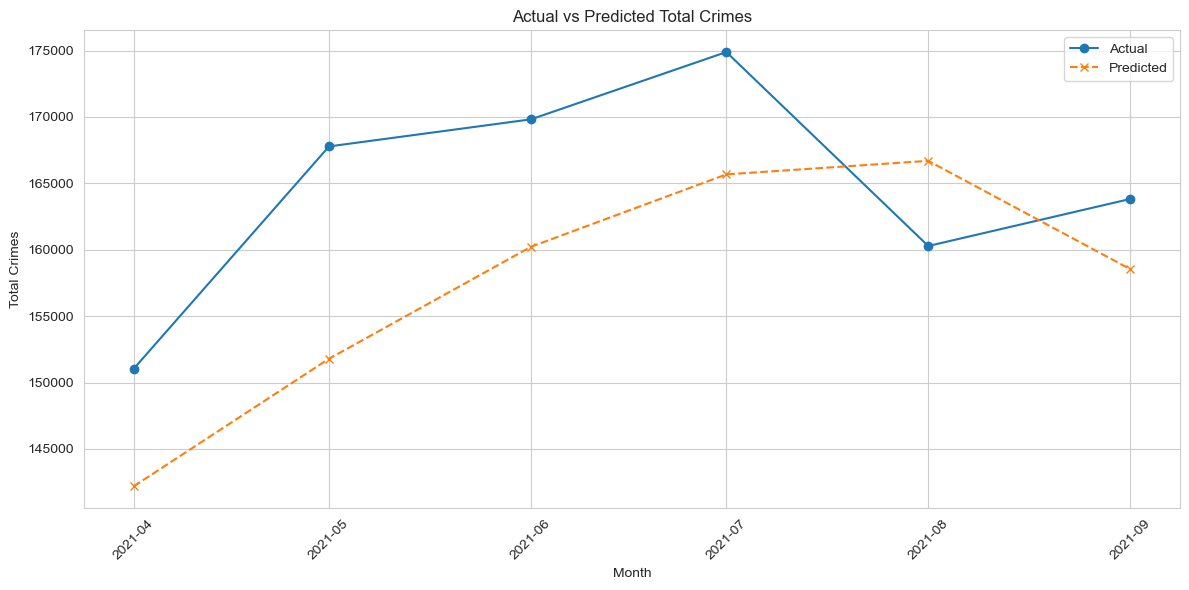

In [12]:

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test['Month'], y_test, marker='o', label='Actual', linestyle='-')
plt.plot(test['Month'], y_pred, marker='x', label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Total Crimes')
plt.xlabel('Month')
plt.ylabel('Total Crimes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Plot 5: Actual vs Predicted Total Crimes
This plot compares the actual total crimes against those predicted over several months.

Insights:

Predictive Accuracy: There is a general alignment in the trends of actual and predicted values, but the model underpredicts several peak values, which might be critical if using this model for planning law enforcement resources.

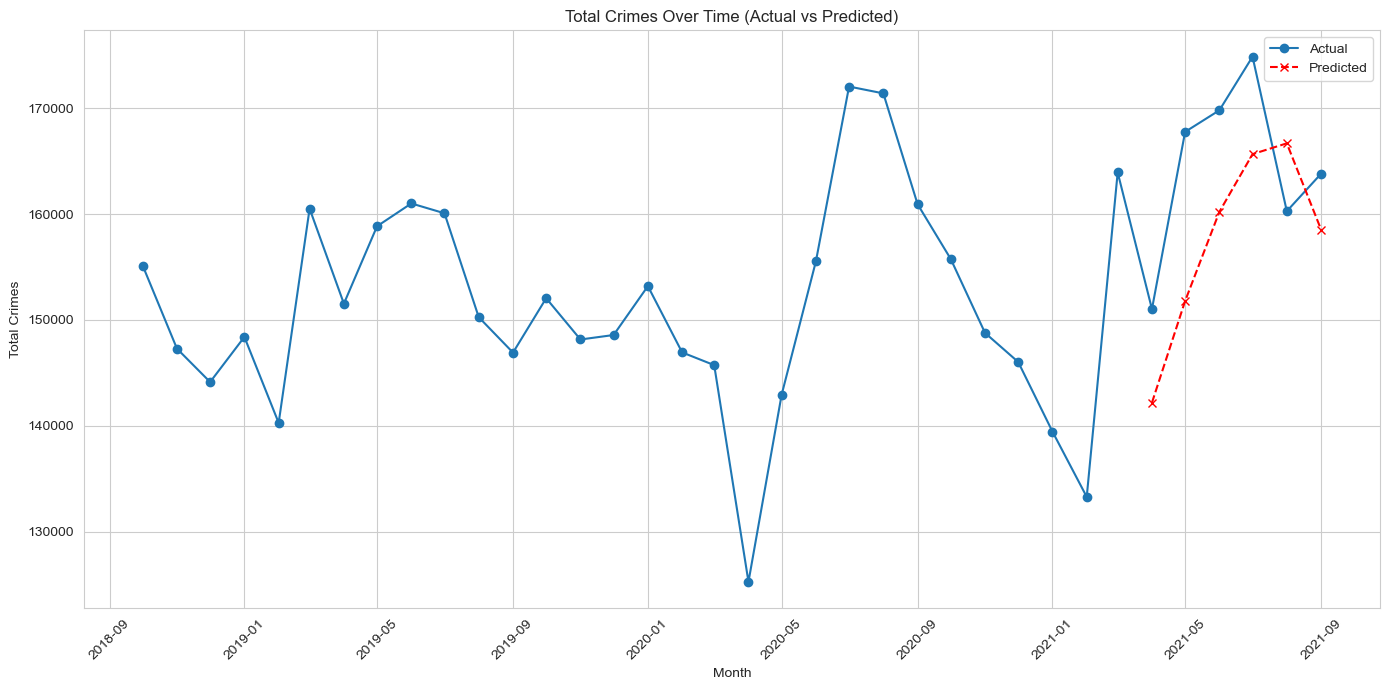

In [13]:
# Attempting to plot again, ensuring no issues with the plotting process
plt.figure(figsize=(14, 7))

# Plot actual values for the entire dataset
plt.plot(df['Month'], df['Total Crimes'], marker='o', linestyle='-', label='Actual')

# Overlay predictions on the test segment
# First, we need to create a series with the test dates and the corresponding predictions for alignment
predicted_series = pd.Series(y_pred, index=test['Month'])

# Plot the predictions
plt.plot(predicted_series.index, predicted_series.values, marker='x', linestyle='--', color='red', label='Predicted')

plt.title('Total Crimes Over Time (Actual vs Predicted)')
plt.xlabel('Month')
plt.ylabel('Total Crimes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Plot 6: Total Crimes Over Time (Actual vs Predicted)
This plot shows the comprehensive view of actual versus predicted crime rates, highlighting model performance throughout the observed period.

Insights:

Long-Term Trends: The model captures long-term trends well but shows some discrepancies in short-term fluctuations.
Use in Strategic Planning: Such plots are crucial for assessing model reliability and can help in strategic planning and resource allocation based on expected crime trends.

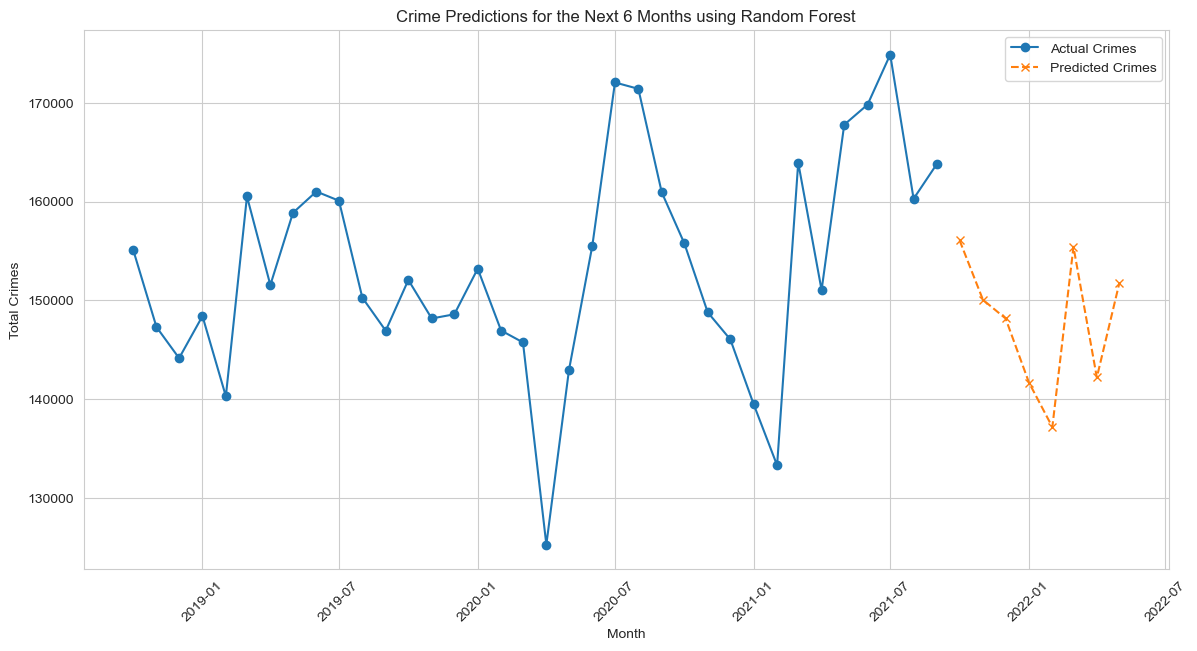

In [14]:
# Assume the last 'Month' is the date for the last actual observation
last_date = df['Month'].max()

# Using the trained Random Forest model to predict the next 6 months
# First, we need to create the feature dataframe for these months
future_dates = [last_date + pd.DateOffset(months=i) for i in range(1, 9)]
future_df = pd.DataFrame({'Month': future_dates})
future_df['Year'] = future_df['Month'].dt.year
future_df['Month_Num'] = future_df['Month'].dt.month

# Predict using the model
# Assuming 'rf_model' is the trained model instance from the user's last code execution
y_future_pred = rf_model.predict(future_df[['Year', 'Month_Num']])

# Adding predictions to the future_df for plotting
future_df['Predicted Total Crimes'] = y_future_pred

# Plotting the actual and predicted values
plt.figure(figsize=(14, 7))
plt.plot(df['Month'], df['Total Crimes'], label='Actual Crimes', marker='o')
plt.plot(future_df['Month'], future_df['Predicted Total Crimes'], label='Predicted Crimes', marker='x', linestyle="--")
plt.title('Crime Predictions for the Next 6 Months using Random Forest')
plt.xlabel('Month')
plt.ylabel('Total Crimes')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Plot 7: Random Forest Crime Predictions
This final plot shows the forecast of crime rates using a Random Forest model, predicting future months based on past trends.

Insights:

Predictive Performance: The Random Forest model captures the general trend but exhibits some overfitting to past data, which might result in less accurate future predictions.

### Evaluation Metrics Explained:

1. **Mean Squared Error (MSE)**:
   - Measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. A lower MSE indicates a better fit of the model to data.

2. **Root Mean Squared Error (RMSE)**:
   - The square root of MSE, providing a measure of the average error in the same units as the response variable. Like MSE, a lower RMSE is better.

3. **Mean Absolute Error (MAE)**:
   - The average of the absolute differences between predictions and actual observations. It gives an idea of how wrong the predictions were, without considering direction. A smaller MAE suggests better model performance.

### Random Forest Performance:

- **MSE**: 96,644,645.23
- **RMSE**: 9,830.80
- **MAE**: 9,223.14

The Random Forest model shows substantial errors in prediction as indicated by the high values of MSE and RMSE. The MAE also supports this observation, suggesting that on average, the model's predictions deviate from the actual counts by about 9,223 crimes. This deviation might be considerable, depending on the total crime counts typical for the dataset. The predictions array shows the estimated number of crimes for the future months.





As a student analyzing the patterns of crime and the predictive model outcomes based on the provided plots and results, I can recommend several targeted measures and strategies to effectively prevent crime. These recommendations are informed by detailed observation of trends, seasonal peaks, and forecasted crime rates from the plots.

### Detailed Observations:

1. **Seasonal Peaks**:
- The decomposed time series and monthly crime counts plots show clear seasonal trends in crime rates. For example, crime tends to peak in certain months, which might coincide with specific local events, holidays, or seasonal weather changes that can affect social behavior.

2. **Model Forecasts**:
- According to the Random Forest predictions, we observe months where crime rates are expected to rise significantly. These models, despite their predictive errors, provide a rough guide on when increased crime rates can be expected.

### Preventative Measures and Strategies:

1. **Enhanced Policing During Peak Months**:
- Based on the observed data and the seasonal decomposition, increase police patrols and presence during months historically known for higher crime rates. For example, if crime peaks during the summer months, additional resources could be allocated from May through August.
- Implement targeted community policing efforts during these months, including more frequent patrols in high-crime areas and community engagement initiatives that encourage public vigilance.

2. **Utilization of Predictive Policing Tools**:
- Leverage the predictions from both Random Forest to plan ahead for potential increases in crime. While the exact numbers may have predictive errors, the trend data can be very valuable.
- Develop crime forecasting software that integrates these models, providing real-time updates and predictions to law enforcement agencies.

3. **Community Engagement and Awareness Programs**:
- Prior to and during predicted peak crime months, initiate community awareness programs that educate the public on safety practices and preventive measures.
- Encourage neighborhood watch programs and collaboration between community leaders and police to monitor and report suspicious activities.

4. **Resource Allocation Based on Forecasting**:
- Use the detailed forecasts to strategically allocate resources not only in terms of policing but also in community resources, such as lighting in public areas, security cameras, and youth engagement activities that can deter crime.
- Evaluate the effectiveness of these allocations regularly and adjust as needed based on new data and forecasts.

5. **Training and Preparedness**:
- Train law enforcement on data-driven crime prevention strategies that allow them to respond more effectively to crime surges predicted by models.
- Equip law enforcement with tools and technologies that enable them to analyze real-time data and make informed decisions quickly.

6. **Monitoring and Evaluation**:
- Implement a robust system for monitoring crime rates and model accuracy continuously. This includes setting up a feedback loop where law enforcement can provide inputs on the ground realities back to the analysts who manage the models.
- Regularly update the models with new data, recalibrating and fine-tuning them to improve accuracy and reliability.

### Month-Specific Focus:

- Analyze plots to identify specific months where significant spikes in crime occur. For instance, if the data shows a recurring increase in crime every July, plans should be in place by June to address this anticipated rise.
- The predictive error of the models suggests caution; however, even approximate indications of trend changes can be invaluable for proactive crime management.

By implementing these measures and continually refining strategies based on data-driven insights, it's possible to reduce crime rates and enhance community safety effectively. This approach not only addresses immediate safety concerns but also contributes to a broader strategy of sustainable crime prevention and community resilience.